## Title

# 🏠 Predictive Modeling of House Prices using Machine Learning


## Table of Contents


- Title:Predictive Modeling of House Prices using Machine Learning

- Problem Statement

- Objective
    - Identify key predictive features using RFE
    - Train and tune an SVR model
    - Evaluate using R², MSE, RMSE, and MAE

- Importing Libraries

- Load the Dataset
    - Load Train Data
    - Load Test Data
    - Combine Train and Test Sets

- Exploratory Data Analysis (EDA)
    - View Dataset Structure
    - Identify Missing Values
    - Columns with High Missing Rates
    - Visualize Missing Data
    - Visualization of Numerical and Categorical Features

- Data Preprocessing
    - Handle Missing Values

- Feature Engineering
    - One-Hot Encoding
    - Feature Scaling

- Data Splitting
    - Train-Test Split

- Feature Selection
    - Lasso (L1) Feature Selection
    - Ridge (L2) Feature Selection
    - ElasticNet Feature Selection
    - SelectKBest Feature Selection
    - RFE (Recursive Feature Elimination)

- Hyperparameter Tuning
    - GridSearchCV with SVR

- Model Evaluation
    - Training Accuracy
    - Testing Accuracy
    - R² Score, MSE, RMSE, MAE

- Results

- Conclusion


## Problem Statement
##### Predicting house prices accurately remains a complex yet critical task in the real estate industry. Many features such as lot size, construction quality, and square footage impact the final sale price. The goal is to build a robust regression model that captures these relationships and provides reliable predictions using a refined feature set selected via Recursive Feature Elimination (RFE).



## Objective
##### The objective of this project is to:

##### Use feature selection techniques (RFE) to identify the most influential variables for predicting house prices.

##### Build and fine-tune a Support Vector Regression (SVR) model using a grid search approach.

##### Evaluate the model’s performance using standard regression metrics including R² score, Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and Mean Absolute Error (MAE).

## importing libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the Datasets (Train)

In [3]:
# Load the Datasets (Train)
train_df = pd.read_csv('train.csv')

In [4]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
train_df.head()

First few rows of the dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
# Display the first few rows of the dataset to understand its structure
print("Last few rows of the dataset:")
train_df.tail()

Last few rows of the dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


##  Load the Datasets (Train)

In [6]:
#  Load the Datasets (Train)
test_df = pd.read_csv('test.csv')

In [7]:
# Display the first few rows of the dataset to understand its structure
print("First few rows of the dataset:")
test_df.head()

First few rows of the dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [8]:
# Display the first few rows of the dataset to understand its structure
print("Last few rows of the dataset:")
test_df.tail()

Last few rows of the dataset:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


##  EDA (Exploratory Data Analysis) 

In [9]:
# Display the size of the dataset (number of rows and columns)
print("Train Dataset size:")
print(train_df.shape)
# Display the size of the dataset (number of rows and columns)
print("Test Dataset size:")
print(test_df.shape)

Train Dataset size:
(1460, 81)
Test Dataset size:
(1459, 80)


#### Combine train and test datasets 

In [10]:
# Combine train and test datasets into a single DataFrame for consistent preprocessing
df = pd.concat([train_df, test_df])


In [11]:
df.shape

(2919, 81)

In [12]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [13]:
df.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


In [14]:
# Display the columns of the dataset
columns = df.columns
print("Columns in the dataset:",columns)

Columns in the dataset: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       '

In [15]:
# Selecting all numerical columns (both float and int types)
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numerical_columns)

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


In [16]:
# Printing the number of numerical columns
num_numerical_columns = len(numerical_columns)
print(f"Number of numerical columns: {num_numerical_columns}")


Number of numerical columns: 38


In [17]:
# Categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [18]:
# Printing the number of categorical columns
num_categorical_columns = len(categorical_columns )
print(f"Number of categorical columns: {num_categorical_columns}")

Number of categorical columns: 43


In [19]:
int_feature=df.select_dtypes(include=["int64"]).columns
print("Total number of integer features:",int_feature.shape[0])
print("integer feature names:",int_feature.tolist())

Total number of integer features: 26
integer feature names: ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [20]:
float_feature=df.select_dtypes(include=["float64"]).columns
print("Total number of floating features:",float_feature.shape[0])
print("Floatingr feature names:",float_feature.tolist())

Total number of floating features: 12
Floatingr feature names: ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [21]:
cat_feature=df.select_dtypes(include=["object"]).columns
print("Total number of categorical features:",cat_feature.shape[0])
print("Categorical feature names:",cat_feature.tolist())

Total number of categorical features: 43
Categorical feature names: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [22]:
# Display concise summary of the DataFrame including column types, non-null counts, and memory usage
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallCond  

In [23]:
# Displaying only columns with missing values
print("Columns with Missing Values:")
missing_values = df.isnull().sum()
missing_columns = missing_values[missing_values > 0]
print(missing_columns)


Columns with Missing Values:
MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64


In [24]:
# Displaying columns with missing values and their missing value percentages
print("Columns with Missing Values and Their Percentages:")
missing_percent = (df.isnull().sum() / df.shape[0]) * 100
missing_percent = missing_percent[missing_percent > 0]  # Filtering only columns with missing values
print(missing_percent)


Columns with Missing Values and Their Percentages:
MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType      60.500171
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64


In [25]:
# Displaying columns with missing values greater than 40% and their percentages
print("Columns with Missing Values Greater Than 40% and Their Percentages:")
missing_percent = (df.isnull().sum() / df.shape[0]) * 100
missing_greater_40 = missing_percent[missing_percent > 40].sort_values(ascending=False)
print(missing_greater_40)


Columns with Missing Values Greater Than 40% and Their Percentages:
PoolQC         99.657417
MiscFeature    96.402878
Alley          93.216855
Fence          80.438506
MasVnrType     60.500171
SalePrice      49.982871
FireplaceQu    48.646797
dtype: float64


#### Several columns in the House Prices dataset have a high proportion of missing values, exceeding 40%. 
##### PoolQC 
##### MiscFeature
##### Alley  
##### Fence 
##### MasVnrType
##### FireplaceQu

#### visualise missing value

<Axes: >

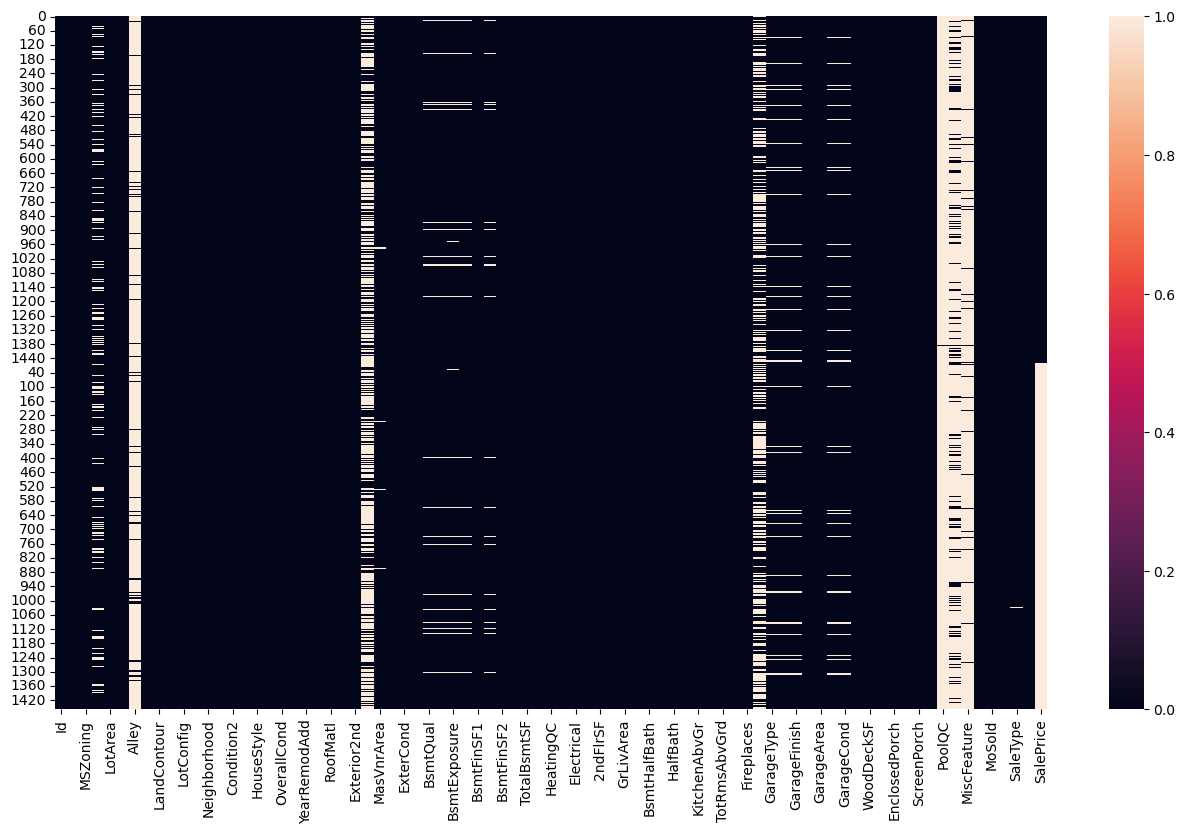

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [27]:
# Displaying unique values count for each categorical column
print("Unique Values Count in Categorical Columns:")
categorical_nunique = df.select_dtypes(include=['object']).nunique()
print(categorical_nunique)




Unique Values Count in Categorical Columns:
MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64


In [28]:
# Displaying unique values count for each numerical column
print("\nUnique Values Count in Numerical Columns:")
numerical_nunique = df.select_dtypes(include=['int64', 'float64']).nunique()
print(numerical_nunique)




Unique Values Count in Numerical Columns:
Id               2919
MSSubClass         16
LotFrontage       128
LotArea          1951
OverallQual        10
OverallCond         9
YearBuilt         118
YearRemodAdd       61
MasVnrArea        444
BsmtFinSF1        991
BsmtFinSF2        272
BsmtUnfSF        1135
TotalBsmtSF      1058
1stFlrSF         1083
2ndFlrSF          635
LowQualFinSF       36
GrLivArea        1292
BsmtFullBath        4
BsmtHalfBath        3
FullBath            5
HalfBath            3
BedroomAbvGr        8
KitchenAbvGr        4
TotRmsAbvGrd       14
Fireplaces          5
GarageYrBlt       103
GarageCars          6
GarageArea        603
WoodDeckSF        379
OpenPorchSF       252
EnclosedPorch     183
3SsnPorch          31
ScreenPorch       121
PoolArea           14
MiscVal            38
MoSold             12
YrSold              5
SalePrice         663
dtype: int64


In [29]:
# Describe the numerical features
print("Statistical description of numerical features:")
df.describe()

Statistical description of numerical features:


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,...,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,...,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,...,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


#### Visualization

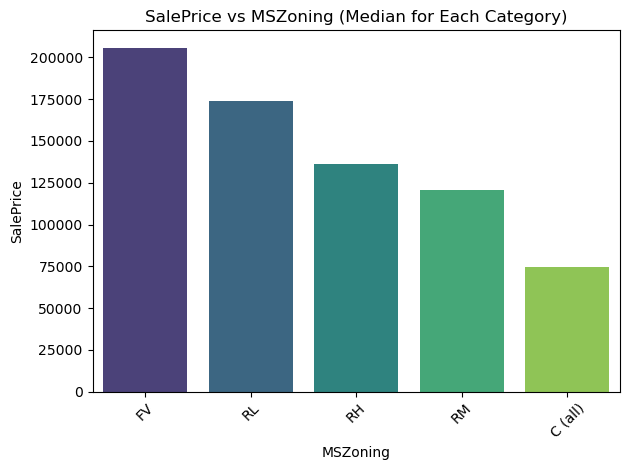

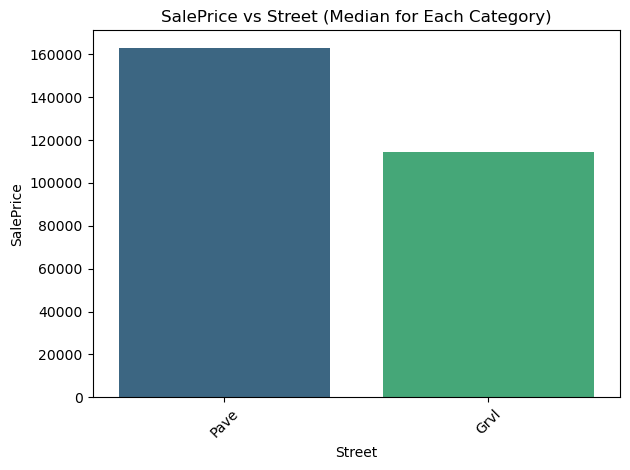

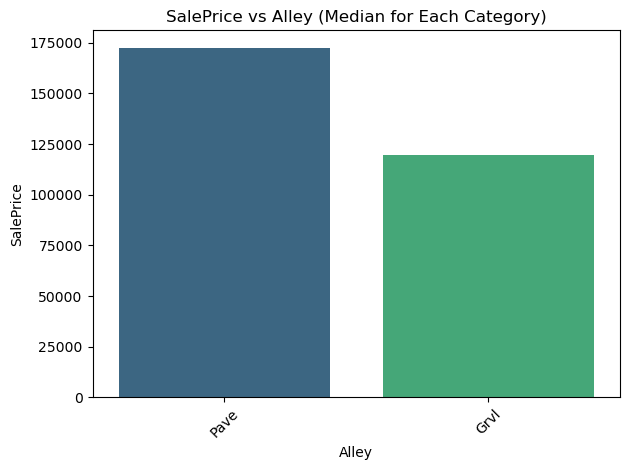

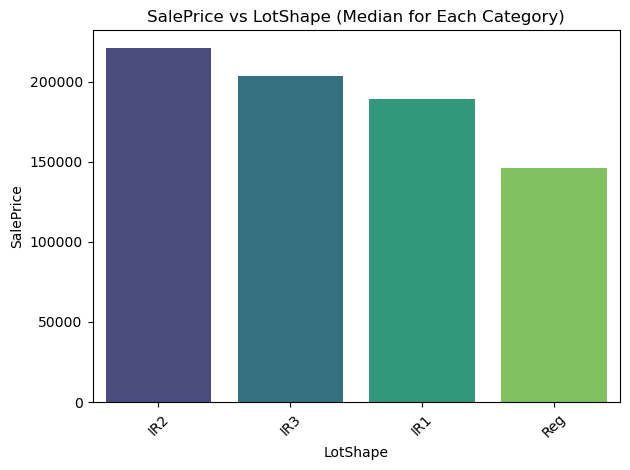

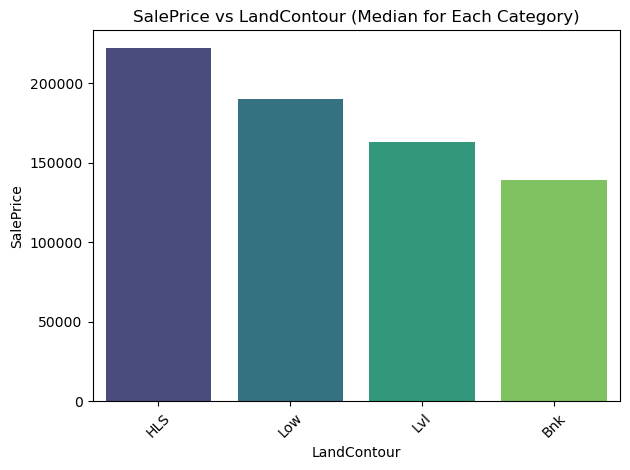

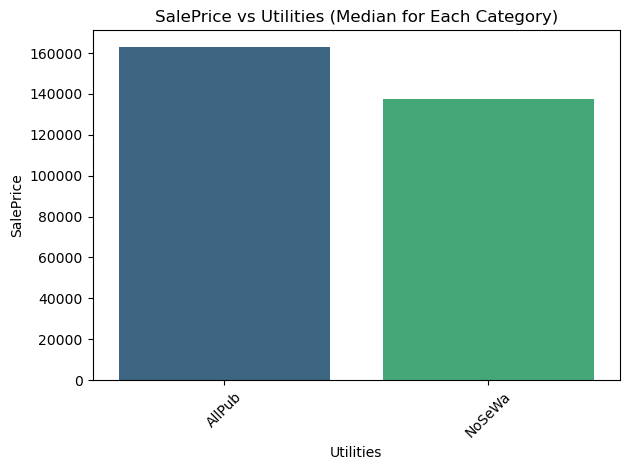

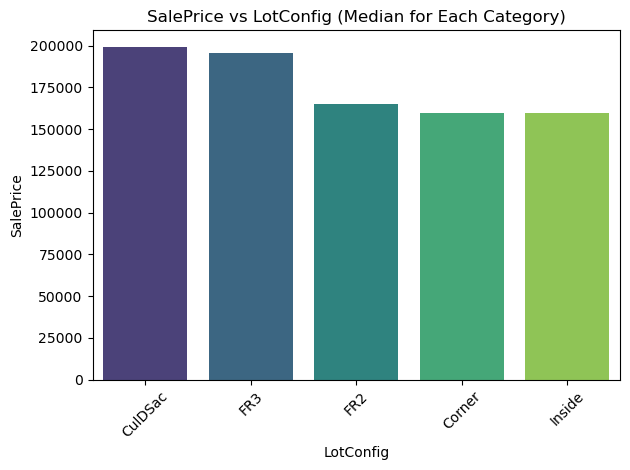

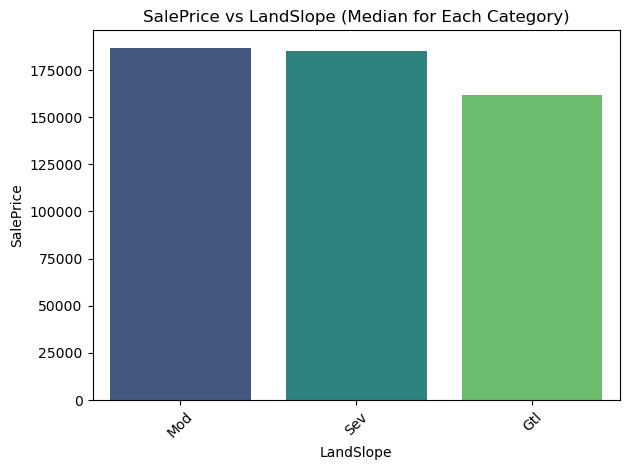

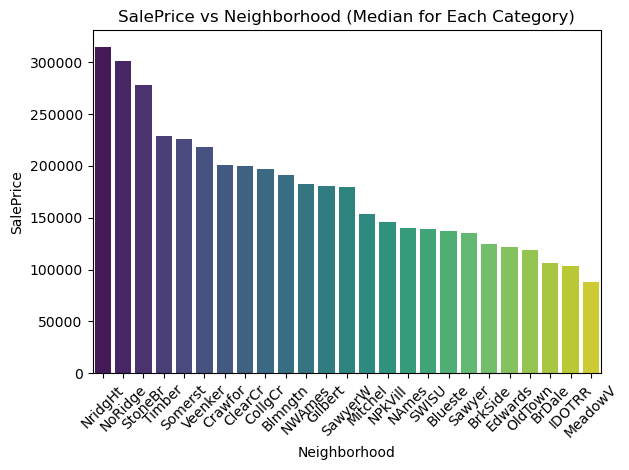

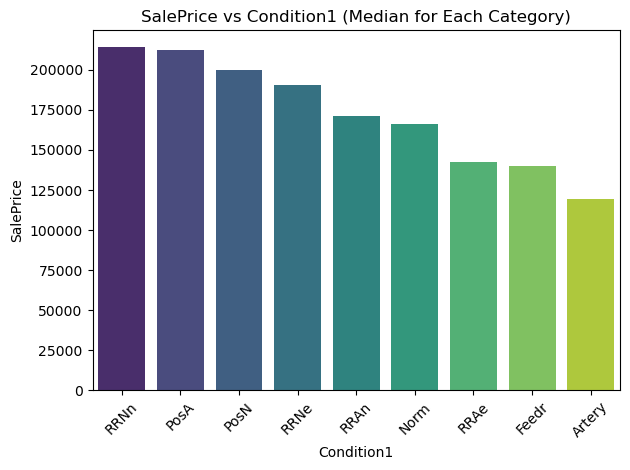

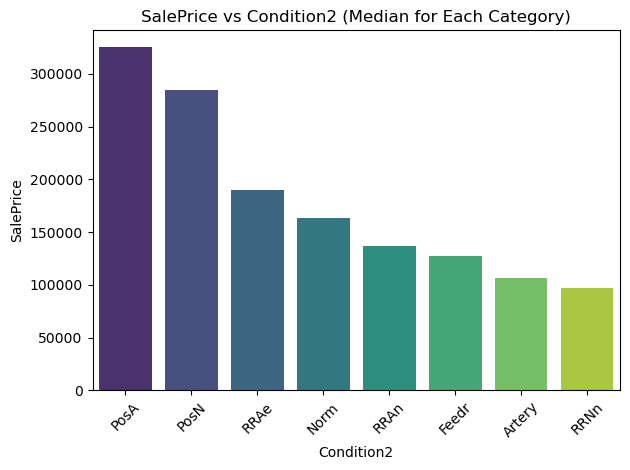

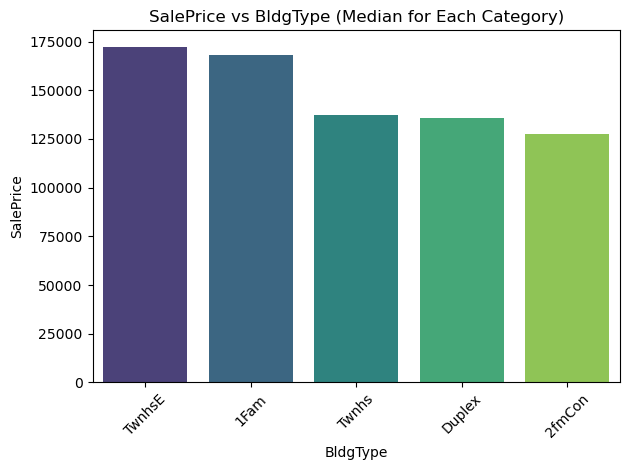

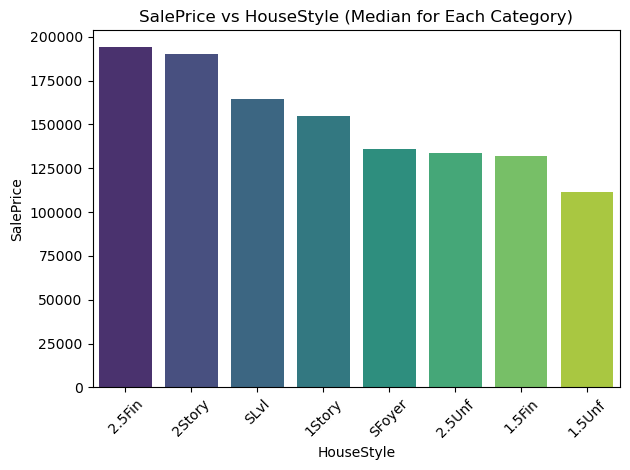

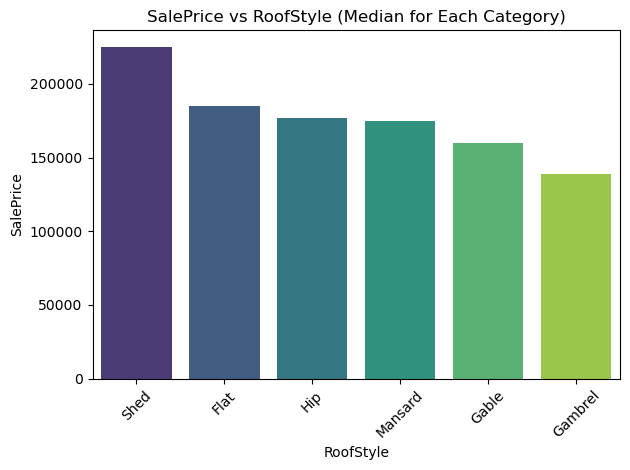

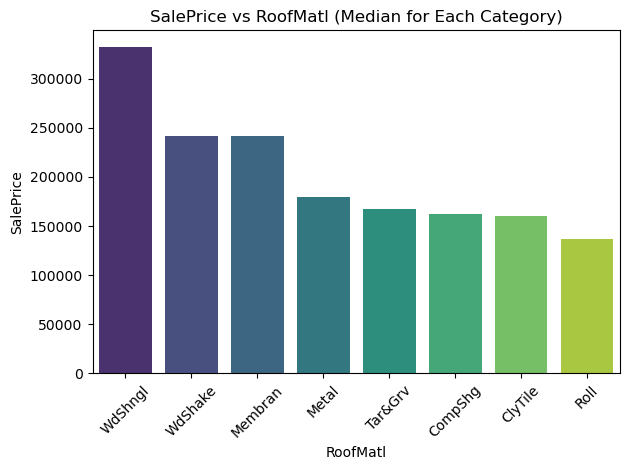

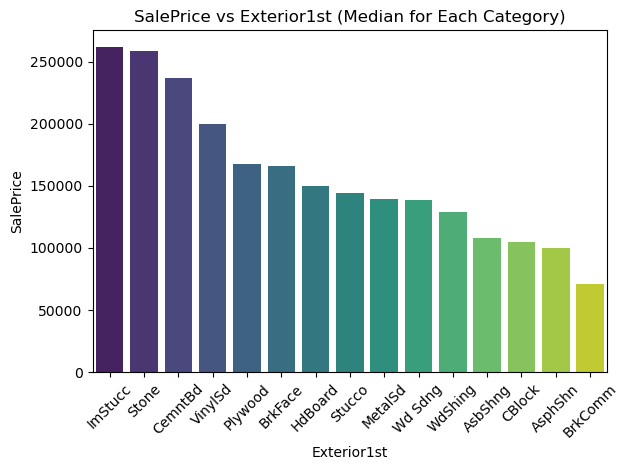

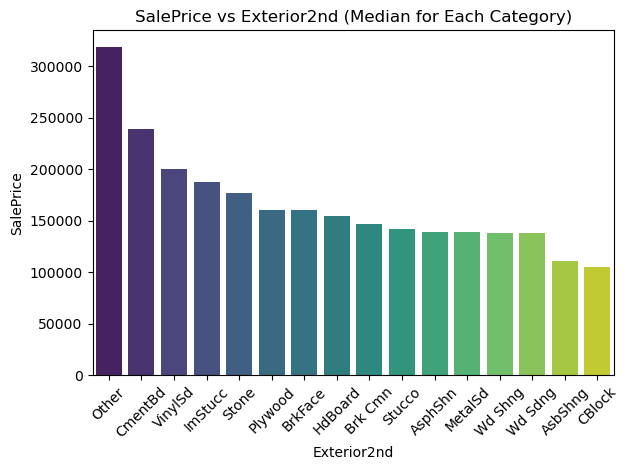

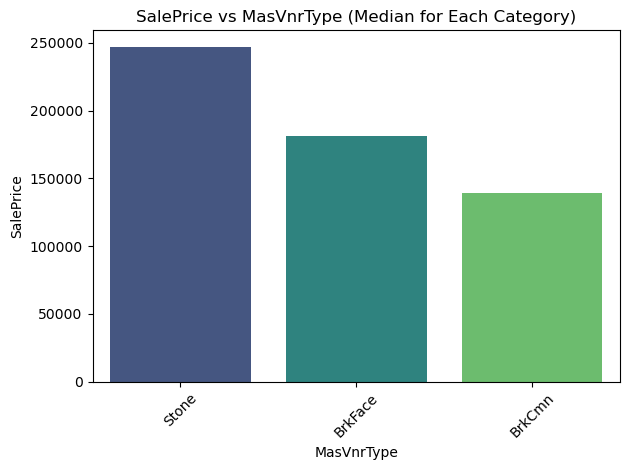

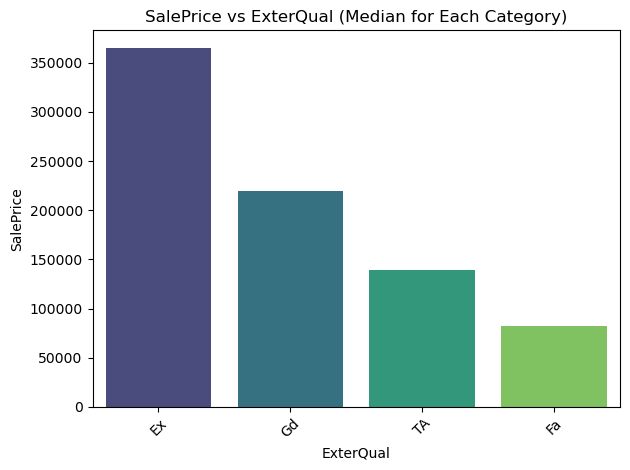

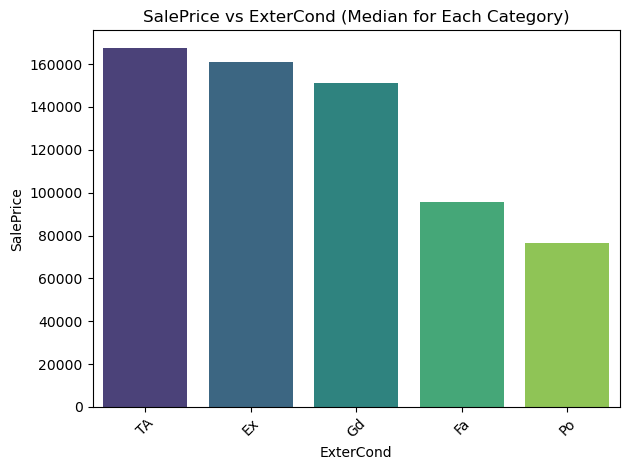

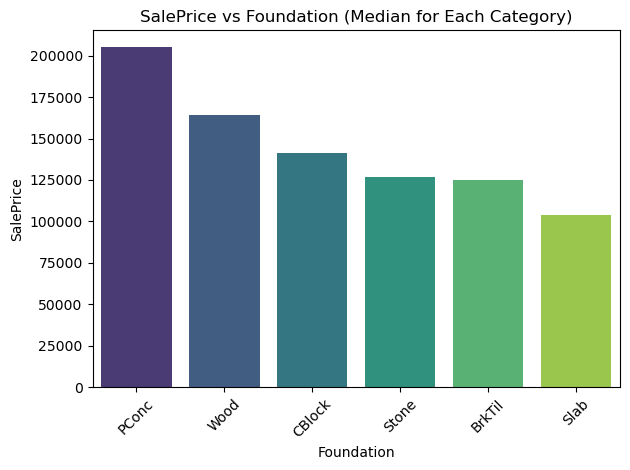

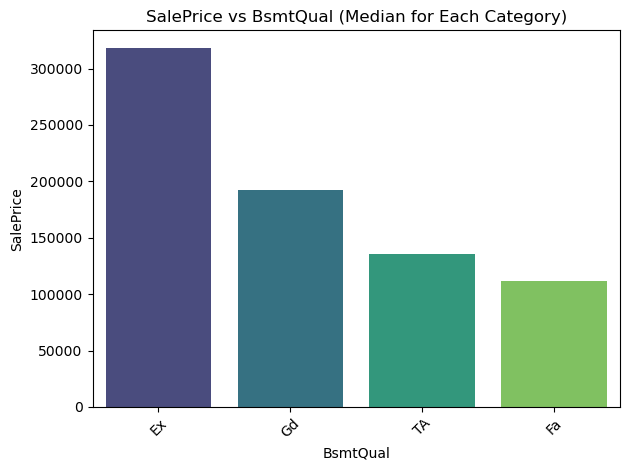

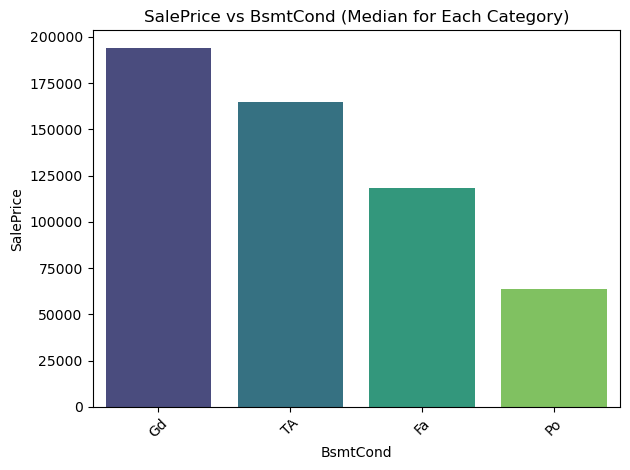

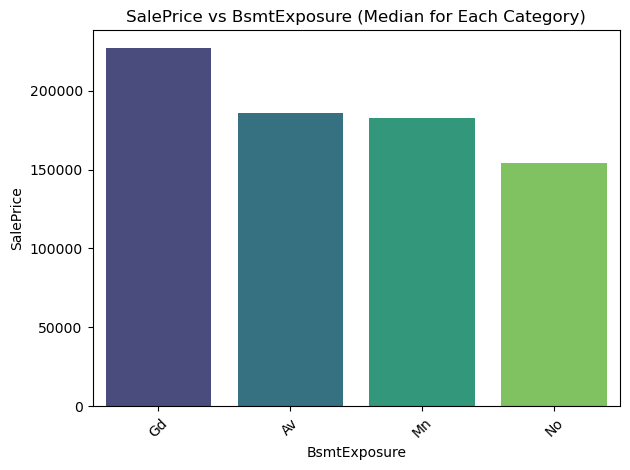

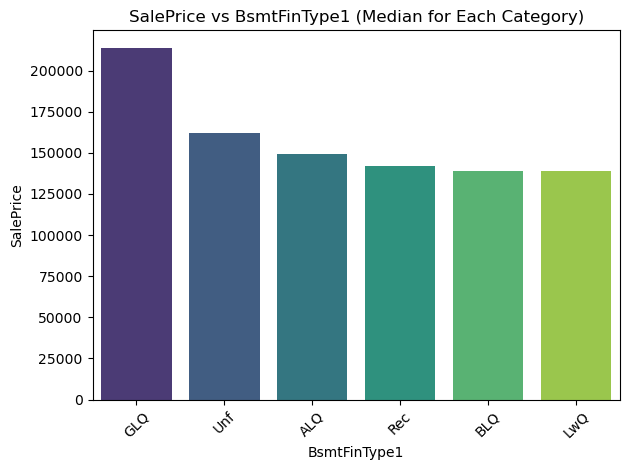

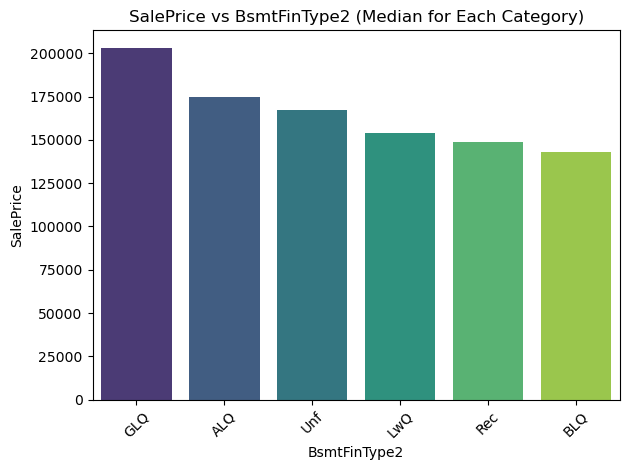

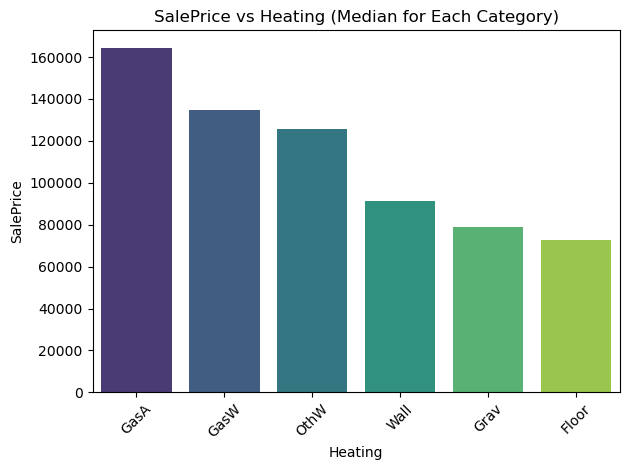

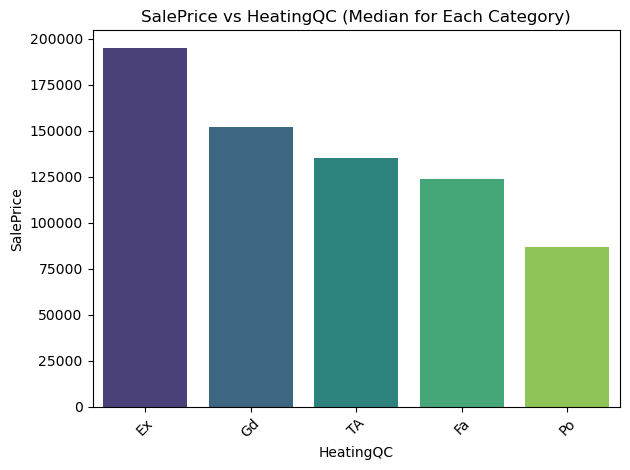

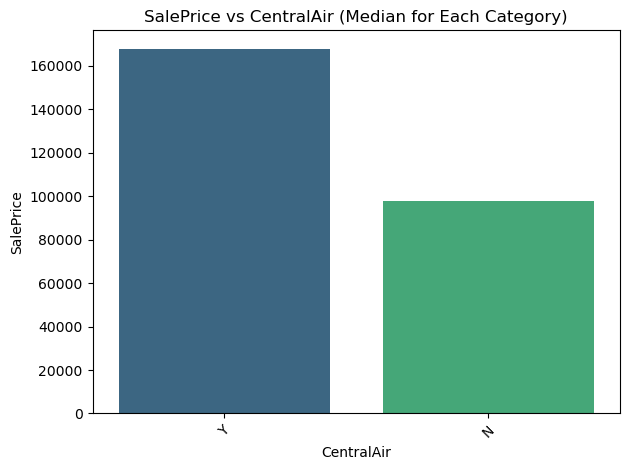

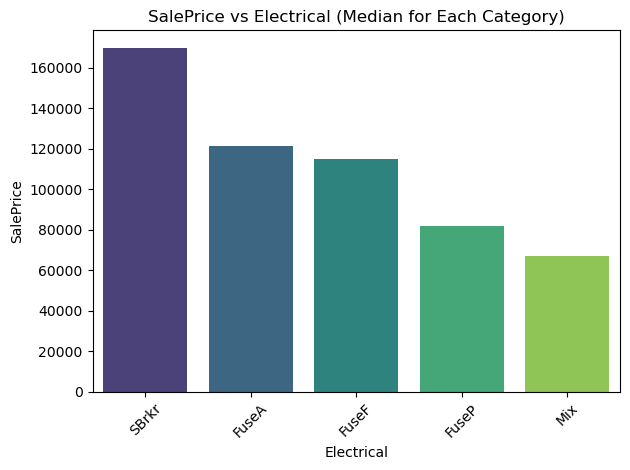

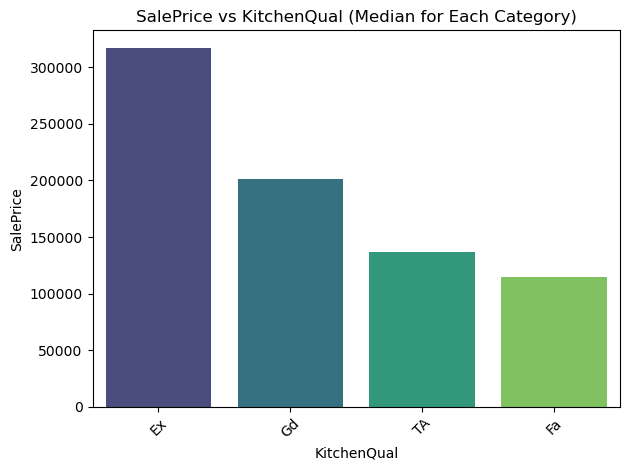

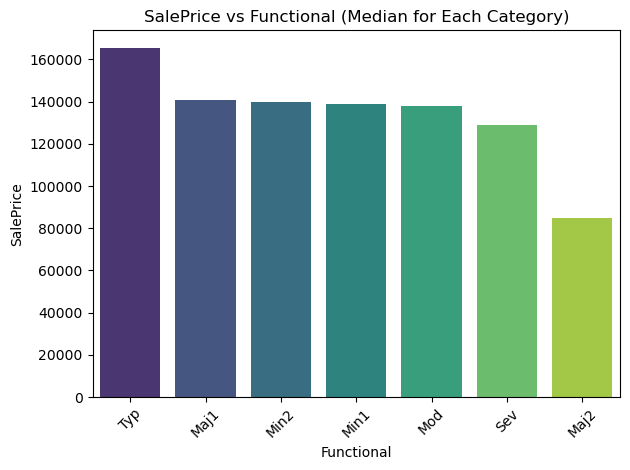

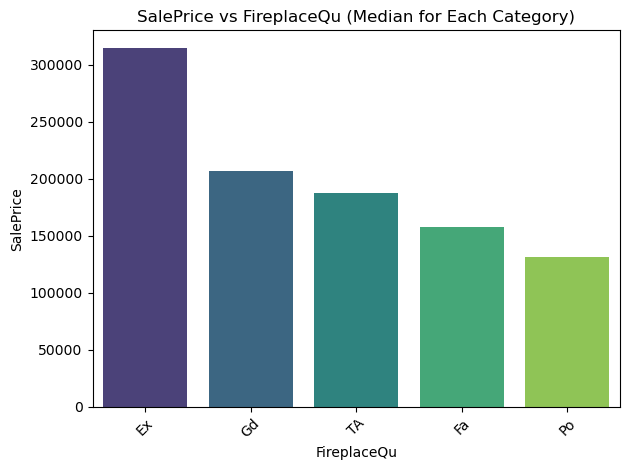

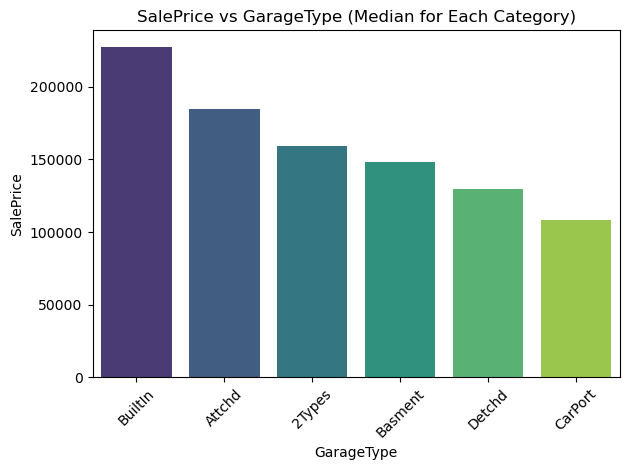

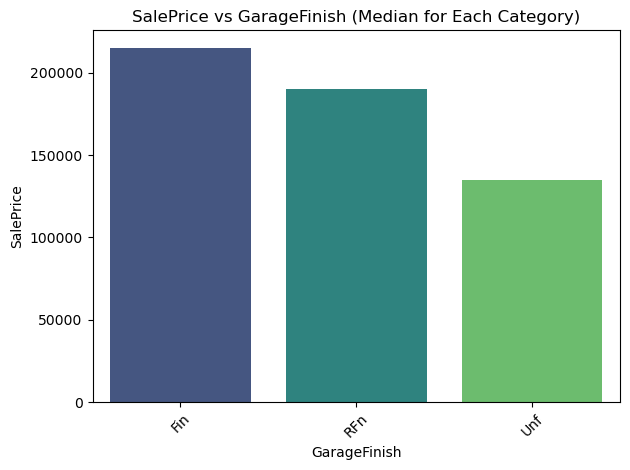

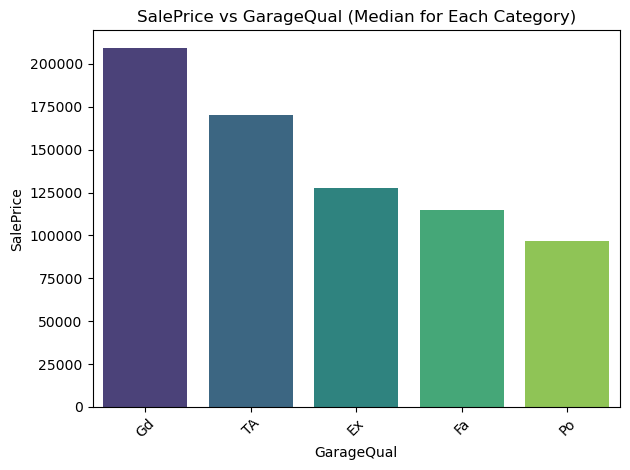

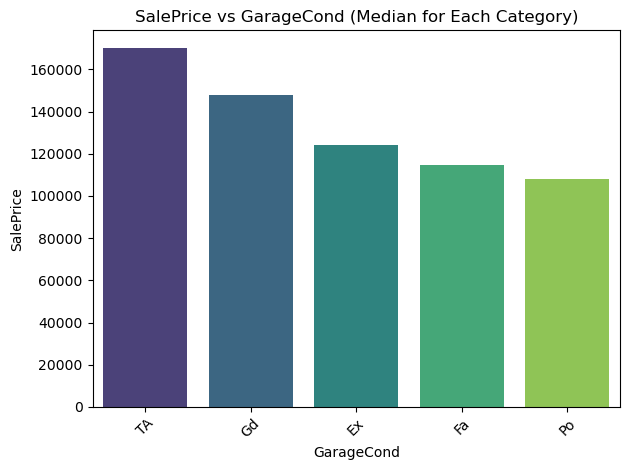

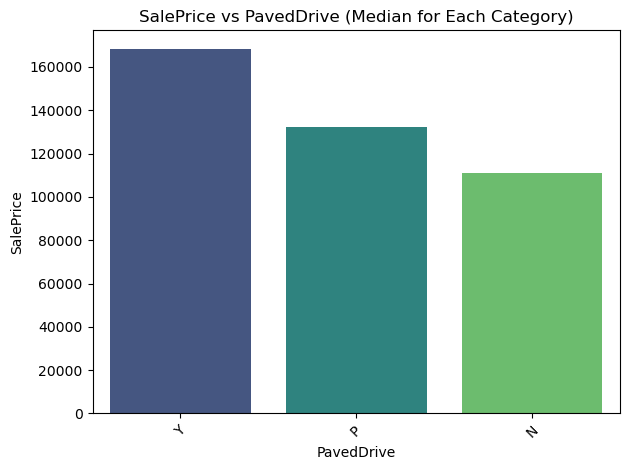

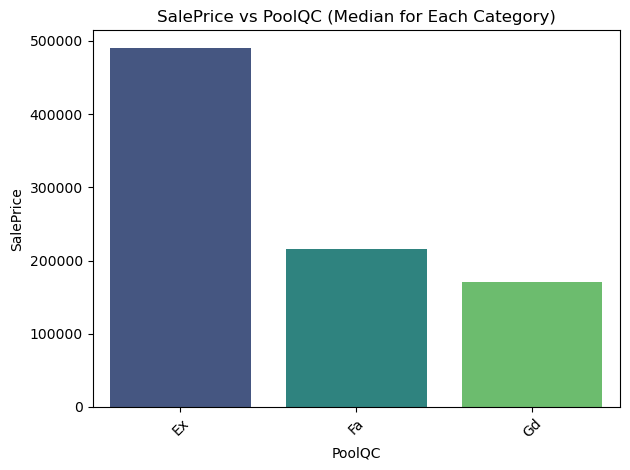

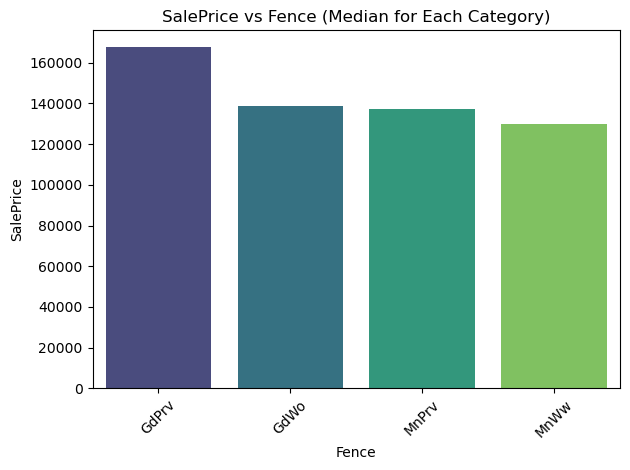

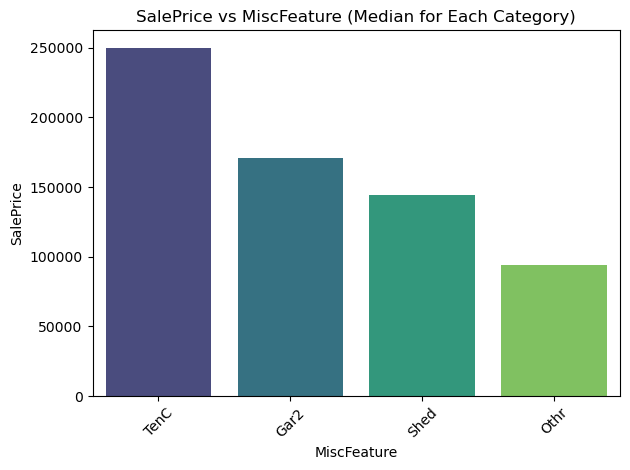

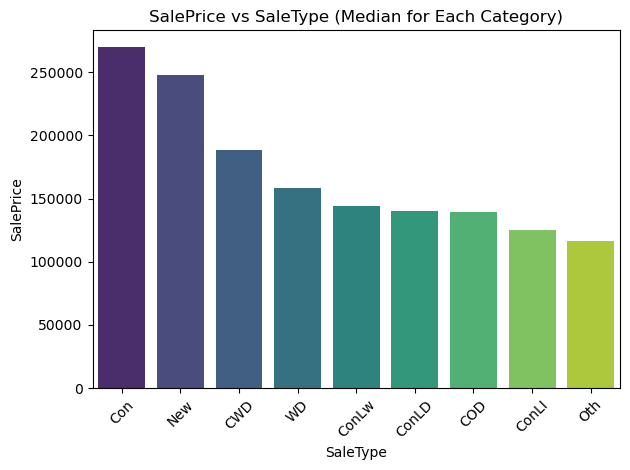

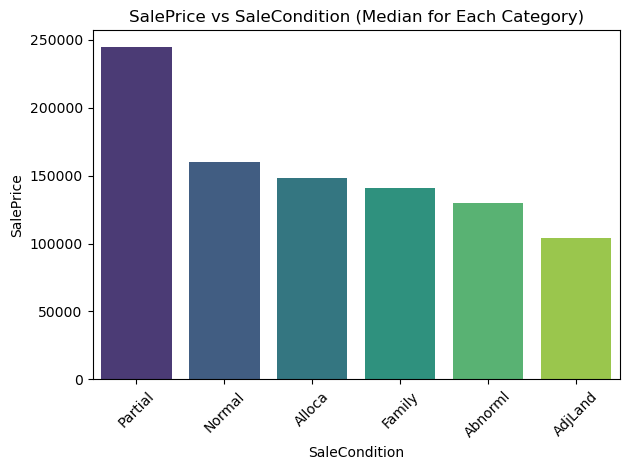

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting SalePrice vs each categorical column (distinct values) with different colors
for col in categorical_columns:
    plt.figure()
    
    # Calculating median SalePrice for each distinct category
    median_values = df.groupby(col)['SalePrice'].median().reset_index().sort_values(by='SalePrice', ascending=False)
    
    # Creating a bar plot with different colors for each category
    sns.barplot(
        x=col, 
        y='SalePrice', 
        data=median_values, 
        ci=None, 
        palette=sns.color_palette("viridis", n_colors=len(median_values))
    )
    
    plt.title(f'SalePrice vs {col} (Median for Each Category)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


                 Impact
PoolQC         319000.0
ExterQual      282356.5
Condition2     228250.0
Neighborhood   227000.0
Exterior2nd    214000.0
BsmtQual       206000.0
KitchenQual    201750.0
RoofMatl       195500.0
Exterior1st    191000.0
FireplaceQu    182750.0
MiscFeature    156000.0
SaleType       153550.0
SaleCondition  140600.0
MSZoning       131250.0
BsmtCond       129879.0
GarageType     119500.0
GarageQual     112615.0
MasVnrType     107839.0
HeatingQC      107700.0
Electrical     103000.0
Foundation     100850.0
Condition1      94450.0
Heating         92000.0
ExterCond       90870.0
RoofStyle       86000.0
LandContour     82850.0
HouseStyle      82750.0
Functional      80500.0
GarageFinish    80000.0
LotShape        75000.0
BsmtFinType1    74750.0
BsmtExposure    72975.0
CentralAir      70000.0
GarageCond      62000.0
BsmtFinType2    60125.0
PavedDrive      57500.0
Alley           53000.0
Street          48750.0
BldgType        44700.0
LotConfig       39564.5
Fence           

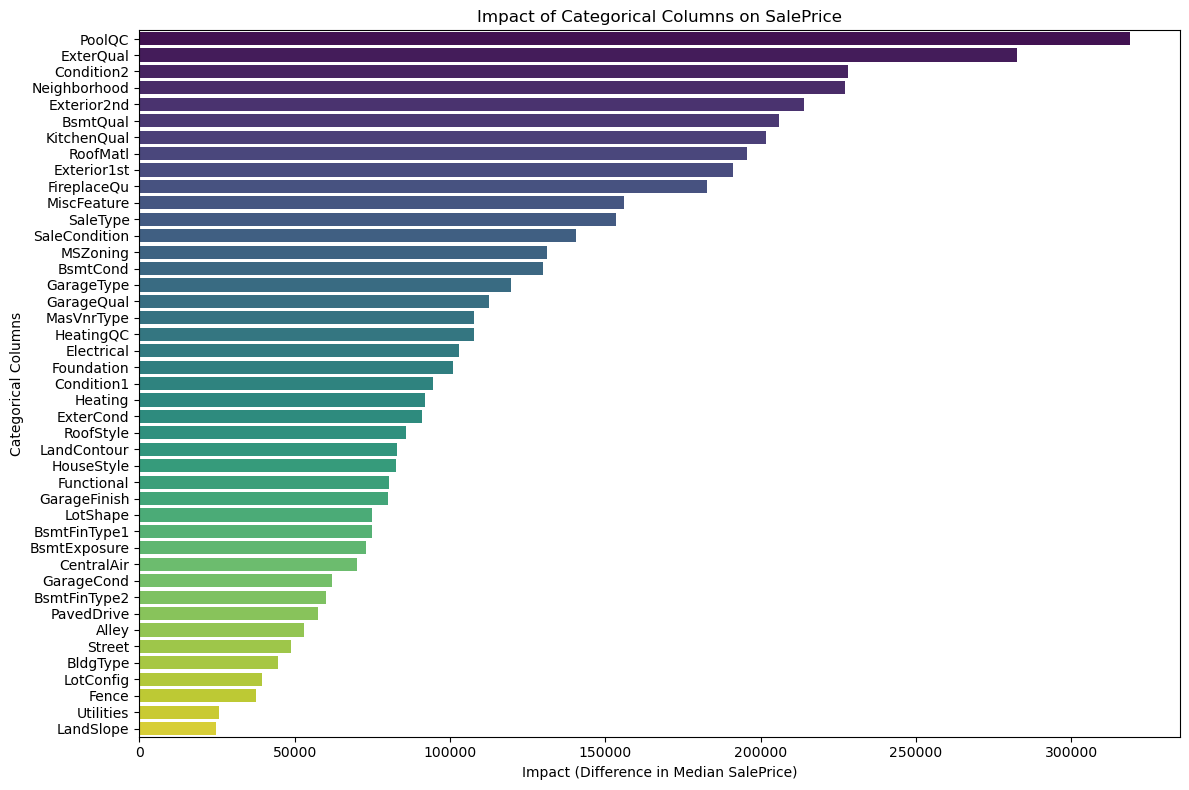

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Calculating the impact of each categorical column on SalePrice
impact_scores = {}

for col in categorical_columns:
    # Calculating the difference between the highest and lowest median SalePrice for each category
    median_values = df.groupby(col)['SalePrice'].median()
    impact_score = median_values.max() - median_values.min()
    impact_scores[col] = impact_score

# Sorting the categorical columns by their impact on SalePrice in descending order
impact_df = pd.DataFrame.from_dict(impact_scores, orient='index', columns=['Impact']).sort_values(by='Impact', ascending=False)

# Displaying the impact scores
print(impact_df)

# Visualizing the impact of each categorical column on SalePrice
plt.figure(figsize=(12, 8))
sns.barplot(y=impact_df.index, x=impact_df['Impact'], palette='viridis')
plt.title("Impact of Categorical Columns on SalePrice")
plt.xlabel("Impact (Difference in Median SalePrice)")
plt.ylabel("Categorical Columns")
plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

# Assuming df is your DataFrame and 'SalePrice' is your target column
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns  # Selecting numerical columns

# Calculating correlation matrix for the DataFrame
correlation_matrix = df[numerical_columns].corr()  # Corrected: Using the entire DataFrame for correlation

# Extracting the correlation values with the target column 'SalePrice'
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)

print("Correlation of Numerical Features with SalePrice:")
print(correlation_with_target)


Correlation of Numerical Features with SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch 

Text(0, 0.5, 'Correlation')

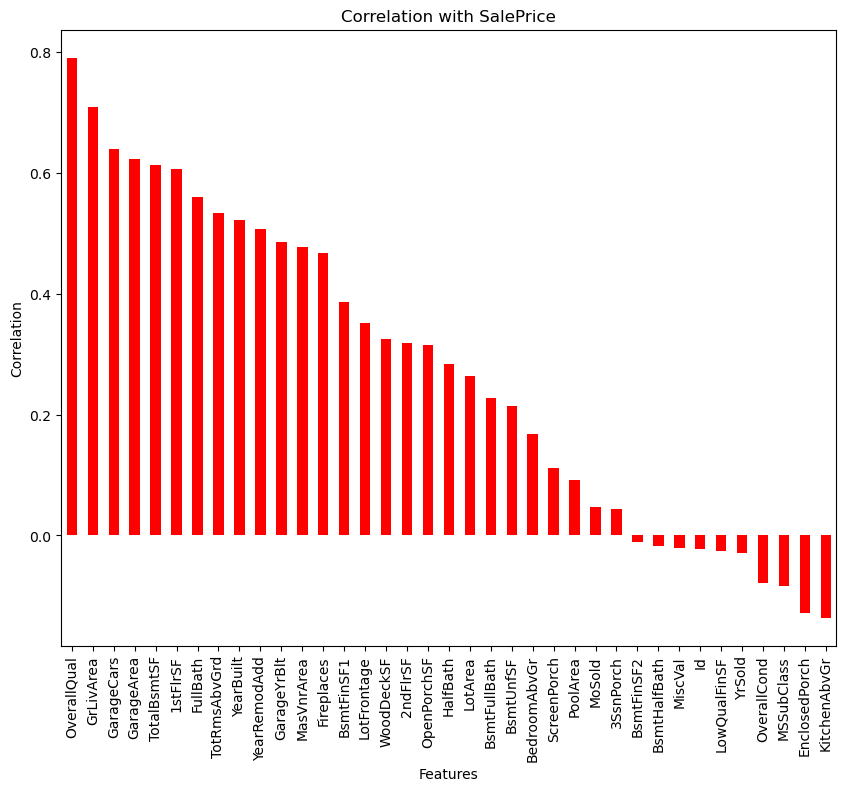

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
correlation_with_target.drop('SalePrice').plot(kind='bar', color='red')
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation')

## Data Preprocessing

#### Handling Missing Values


In [34]:
#Checking Missing values
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
                 ... 
MoSold              0
YrSold              0
SaleType            1
SaleCondition       0
SalePrice        1459
Length: 81, dtype: int64

In [35]:
#Extracting columns with missing values
missing = df.isnull().sum()
missing[missing!=0] 

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType      1766
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [36]:
#Dealing with missing values in "MSZoning" (Identifies the general zoning classification of the sale)
#Replacing Nan with "Unknown"

df.MSZoning.fillna( "Unknown", inplace=True)

In [37]:
#Dealing with missing values in "LotFrontage" (Linear feet of street connected to property)

#Assuming this distance to be zero, replacing all NaN with 0

df.LotFrontage.fillna(0, inplace=True)

In [38]:
#Dealing with missing values in "Alley"(Type of alley access to property: Grvl(Gravel), Pave(Paved), NA(No alley access))
#Replacing NaN with "None"

df.Alley.fillna("None", inplace=True)

In [39]:
#Dealing with missing values in "Utilities"(Type of utilities available)
#Replacing NaN with "None" as no utilities available in these cases

df.Utilities.fillna("None", inplace=True)

In [40]:
#Dealing with missing values in "Exterior1st" and "Exterior2nd" (Exterior covering on house)
#Replacing Nan with "Unknown"

df.Exterior1st.fillna( "Unknown", inplace=True)
df.Exterior2nd.fillna( "Unknown", inplace=True)

In [41]:
#Dealing with missing values in "MasVnrType"(Masonry veneer type : BrkCmn(Brick Common),BrkFace(Brick Face),
#                                              CBlock(Cinder Block), None, Stone)

#Replacing NaN with "None"

df.MasVnrType.fillna("None", inplace=True)

In [42]:
#Dealing with missing values in "MasVnrArea"
df[df.MasVnrArea.isnull()][['MasVnrType','MasVnrArea']]

,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN
231,None,NaN
246,None,NaN


In [43]:
#Replacing Nan with 0
df.MasVnrArea.fillna(0, inplace=True)

In [44]:
#Dealing with missing values in "BsmtQual"(Evaluates the height of the basement :
#                                           Ex-Excellent (100+ inches),
#                                           Gd-Good (90-99 inches)
#                                           TA-Typical (80-89 inches)
#                                           Fa-Fair (70-79 inches)
#                                           Po-Poor (<70 inches
#                                           NA-No Basement )
#Replacing NaN with "None"

df.BsmtQual.fillna("None", inplace=True)

In [45]:
#Dealing with missing values in "BsmtCond"(Evaluates the general condition of the basement)
df[df.BsmtCond.isnull()][['BsmtQual','BsmtCond']]

,BsmtQual,BsmtCond
17,None,NaN
39,None,NaN
90,None,NaN
102,None,NaN
156,None,NaN
...,...,...
1343,None,NaN
1344,None,NaN
1364,None,NaN
1431,None,NaN


In [46]:
#Replacing Nan with 'None' as no basement present in these cases
df.BsmtCond.fillna("None", inplace=True)

In [47]:
#Dealing with missing values in "BsmtExposure"(Refers to walkout or garden level walls:
#                                              Gd - Good Exposure,
#                           Av - Average Exposure (split levels or foyers typically score average or above),
#                           Mn - Mimimum Exposure,
#                           No - No Exposure,
#                           NA - No Basement)

#Replacing NaN with "No"
df.BsmtExposure.fillna("None", inplace=True)

In [48]:
#Dealing with missing values in "BsmtFinType1" and "BsmtFinType2" (Rating of basement finished area)
#Replacing NaN with "None" as no basement present 

df.BsmtFinType1.fillna("None", inplace=True)
df.BsmtFinType2.fillna("None", inplace=True)

In [49]:
#Dealing with missing values in "BsmtFinSF1" and "BsmtFinSF2" (finished square feet)
#Replacing Nan with 0

df.BsmtFinSF1.fillna(0, inplace=True)
df.BsmtFinSF2.fillna(0, inplace=True)

In [50]:
#Dealing with missing values in "BsmtUnfSF" (Unfinished square feet of basement area) 
#                           and "TotalBsmtSF" (Total square feet of basement area)
#Replacing Nan with 0

df.BsmtUnfSF.fillna(0, inplace=True)
df.TotalBsmtSF.fillna(0, inplace=True)

In [51]:
#Dealing with missing values in "Electrical"(Electrical system)
#Replacing NaN with "None"

df.Electrical.fillna("None", inplace=True)

In [52]:
#Dealing with missing values in "BsmtFullBath" (Basement full bathrooms) and "BsmtHalfBath" (Basement half bathrooms)
#Replacing NaN with "0" as no bathroom present

df.BsmtFullBath.fillna(0, inplace=True)
df.BsmtHalfBath.fillna(0, inplace=True)

In [53]:
#Dealing with missing values in "KitchenQual" (Kitchen quality)
#Replacing NaN with "Unknown"

df.KitchenQual.fillna("None", inplace=True)

In [54]:
#Dealing with missing values in "Functional" (Home functionality )
#Replacing NaN with "Unknown"

df.Functional.fillna("None", inplace=True)

In [55]:
#Dealing with missing values in "FireplaceQu" (Fireplace quality: 
#                                                Ex:Excellent - Exceptional Masonry Fireplace
#                                                Gd:Good - Masonry Fireplace in main level
#                                                TA:Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
#                                                Fa:Fair - Prefabricated Fireplace in basement
#                                                Po:Poor - Ben Franklin Stove
#                                                NA:No Fireplace)
#Replacing NaN with "None" as no Fireplace

df.FireplaceQu.fillna("None", inplace=True)

In [56]:
#Dealing with missing values in "GarageType" (Garage location), "GarageYrBlt" (Year garage was built), 
#                               "GarageFinish" (Interior finish of the garage), "GarageQual"(Garage quality),
#                               "GarageCars" (Size of garage in car capacity), "GarageArea" (Size of garage in square feet) and
#                               "GarageCond"(Garage condition)

#Replacing Nan in "GarageYrBlt" and "GarageArea" with 0 and for others replacing Nan with "None" as no garage present here.

df.GarageYrBlt.fillna(0, inplace=True)
df.GarageCars.fillna(0, inplace=True)
df.GarageArea.fillna(0, inplace=True)

df.GarageType.fillna("None", inplace=True)
df.GarageFinish.fillna("None", inplace=True)
df.GarageQual.fillna("None", inplace=True)
df.GarageCond.fillna("None", inplace=True)

In [57]:
#Dealing with missing values in "SaleType"(Type of sale)
#Replacing NaN with "Unknown"
df.SaleType.fillna("Unknown", inplace=True)

In [58]:
#Dealing with missing values in "PoolQC" (Pool quality: Ex-Excellent, Gd-Good, TA-Average/Typical, Fa-Fair, NA-No Pool)
#Replacing NaN with "None"
df.PoolQC.fillna("None", inplace=True)

In [59]:
#Dealing with missing values in "Fence" (Fence quality: GdPrv-Good Privacy, MnPrv-Minimum Privacy, GdWo-Good Wood,
#                                                       MnWw-Minimum Wood/Wire, NA-No Fence)
#Replacing NaN with "None"
df.Fence.fillna("None", inplace=True)

In [60]:
#Dealing with missing values in "MiscFeature"(Miscellaneous feature not covered in other categories)
#Replacing NaN with "None" as no Miscellaneous feature present

df.MiscFeature.fillna("None", inplace=True)

In [61]:
df.isnull().sum().sum()

1459

In [62]:
#Checking for Duplicates

df.duplicated().sum()

0

## Feature Engineering

### One-Hot Encoding

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

#  One-Hot Encode categorical columns in df
cat_cols = df.select_dtypes(include="object").columns

#  Apply One-Hot Encoding
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)



### Feature Scaling

In [64]:
from sklearn.preprocessing import StandardScaler

# Create a scaler instance
scaler = StandardScaler()

# Identify columns to scale (excluding 'SalePrice')
cols_to_scale = [col for col in df.columns if col != 'SalePrice']

# Apply StandardScaler to the selected columns
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

# View the updated DataFrame
print(df.head())


         Id  MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
0 -1.731458    0.067331     0.216075 -0.217879     0.646183    -0.507284   
1 -1.730271   -0.873616     0.664158 -0.072044    -0.063185     2.188279   
2 -1.729084    0.067331     0.305692  0.137197     0.646183    -0.507284   
3 -1.727897    0.302568     0.066714 -0.078385     0.646183    -0.507284   
4 -1.726711    0.067331     0.783647  0.518903     1.355551    -0.507284   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0   1.046258      0.896833    0.529034    0.581145  ...       -0.052423   
1   0.154764     -0.395604   -0.567016    1.178255  ...       -0.052423   
2   0.980221      0.848965    0.338903    0.098189  ...       -0.052423   
3  -1.859351     -0.682812   -0.567016   -0.494529  ...       -0.052423   
4   0.947203      0.753229    1.390216    0.469187  ...       -0.052423   

   SaleType_New  SaleType_Oth  SaleType_Unknown  SaleType_WD  \
0     -0.298629     -0.04902

## Data Splitting

In [65]:
# Split back into train and test based on 'SalePrice'
train = df[df["SalePrice"].notna()]
test = df[df["SalePrice"].isna()]

#  Drop 'SalePrice' from test set
test.drop("SalePrice", axis=1, inplace=True)

In [66]:

# View shapes
print("Train shape:", train.shape)
print("Test shape:", test.shape)

Train shape: (1460, 269)
Test shape: (1459, 268)


In [67]:
# Defining feature matrix X and target vector y
X = train.drop('SalePrice', axis=1)
y = train['SalePrice']


In [68]:
y= np.log1p(y)
print('logged')

logged


In [69]:
#Splitting the dataset into 70-30, that is, 80% of the data is for training and 30% of the data is for testing.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

### Model Training & Evaluation (Without feature Selection & Hyperparameter Tuning)

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd

# Lists to store results
model_name = []
RMSE = []
MSE = []
MAE = []
Train_R2 = []
Test_R2 = []

# List of models
models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(max_iter=1000),
    XGBRegressor(verbosity=0)
]

# Train and evaluate each model
for model in models:
    model.fit(X_train, y_train)
    
    # Predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Metrics
    RMSE.append(mean_squared_error(y_test, test_pred, squared=False))
    MSE.append(mean_squared_error(y_test, test_pred))
    MAE.append(mean_absolute_error(y_test, test_pred))
    Train_R2.append(f"{r2_score(y_train, train_pred) * 100:.2f} %")
    Test_R2.append(f"{r2_score(y_test, test_pred) * 100:.2f} %")

# Create results DataFrame
models_df = pd.DataFrame({
    "Model-Name": model_name,
    "RMSE": RMSE,
    "MSE": MSE,
    "MAE": MAE,
    "Train_R2 (%)": Train_R2,
    "Test_R2 (%)": Test_R2
})

# Format and display
models_df = models_df.set_index("Model-Name").sort_values("Test_R2 (%)", ascending=False)
display(models_df)


,RMSE,MSE,MAE,Train_R2 (%),Test_R2 (%)
Model-Name,,,,,
GradientBoostingRegressor,1.429820e-01,2.044386e-02,9.735180e-02,96.62 %,87.59 %
RandomForestRegressor,1.544899e-01,2.386713e-02,1.048749e-01,98.02 %,85.51 %
XGBRegressor,1.600192e-01,2.560613e-02,1.083778e-01,99.99 %,84.45 %
DecisionTreeRegressor,1.986498e-01,3.946172e-02,1.451957e-01,100.00 %,76.04 %
SVR,1.989446e-01,3.957897e-02,1.171963e-01,96.07 %,75.97 %
ExtraTreeRegressor,2.332635e-01,5.441185e-02,1.625997e-01,100.00 %,66.96 %
MLPRegressor,3.118092e+00,9.722500e+00,1.433051e+00,97.11 %,-5802.83 %
LinearRegression,4.485334e+11,2.011822e+23,3.794132e+10,94.43 %,-122143951719836377447137280.00 %


### Lasso (L1) Feature Selection

In [71]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Lasso model
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed

# SelectFromModel with Lasso
selector_lasso = SelectFromModel(lasso_model, max_features=10)
X_lasso = selector_lasso.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_lasso = selector_lasso.get_support(indices=True)

# Print selected feature names
selected_features_lasso = X_train.columns[selected_indices_lasso]
print("Selected features using SelectFromModel with Lasso:", selected_features_lasso)

Selected features using SelectFromModel with Lasso: Index(['OverallQual', 'YearBuilt', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea',
       'GarageCars', 'GarageArea'],
      dtype='object')


In [72]:
X1 = X[selected_features_lasso]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
SVR,0.163700,0.026798,0.107423,85.64 %
GradientBoostingRegressor,0.168074,0.028249,0.113925,84.86 %
RandomForestRegressor,0.170375,0.029028,0.113569,84.44 %
LinearRegression,0.173599,0.030137,0.121197,83.85 %
XGBRegressor,0.179049,0.032059,0.121635,82.82 %
DecisionTreeRegressor,0.212318,0.045079,0.147412,75.84 %
ExtraTreeRegressor,0.214627,0.046065,0.149035,75.32 %
MLPRegressor,0.553027,0.305839,0.402507,-63.89 %


### L2 (Ridge) Feature Selection

In [73]:
from sklearn.linear_model import Ridge
from sklearn.feature_selection import SelectFromModel

# Ridge model (L2 regularization)
ridge_model = Ridge(alpha=1.0)

# SelectFromModel with Ridge
selector_ridge = SelectFromModel(ridge_model, max_features=10)
X_ridge = selector_ridge.fit_transform(X_train, y_train)

# Get selected feature indices
selected_indices_ridge = selector_ridge.get_support(indices=True)

# Print selected feature names
selected_features_ridge = X_train.columns[selected_indices_ridge]
print("Selected features using SelectFromModel with Ridge:", selected_features_ridge)


Selected features using SelectFromModel with Ridge: Index(['OverallQual', 'YearBuilt', 'GrLivArea', 'MSZoning_FV', 'MSZoning_RL',
       'MSZoning_RM', 'GarageQual_TA', 'GarageCond_TA', 'SaleType_New',
       'SaleCondition_Partial'],
      dtype='object')


In [74]:
X1 = X[selected_features_ridge]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,0.167141,0.027936,0.121502,85.03 %
LinearRegression,0.168523,0.028400,0.125092,84.78 %
SVR,0.171595,0.029445,0.122895,84.22 %
RandomForestRegressor,0.180000,0.032400,0.126331,82.64 %
XGBRegressor,0.180594,0.032614,0.130943,82.52 %
ExtraTreeRegressor,0.221495,0.049060,0.164783,73.71 %
DecisionTreeRegressor,0.229072,0.052474,0.166254,71.88 %
MLPRegressor,0.430370,0.185218,0.239679,0.75 %


### ElasticNet Feature Selection

In [75]:
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import SelectFromModel

# ElasticNet model (L1 + L2 regularization)
elastic_model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # Adjust alpha and l1_ratio as needed

# SelectFromModel with ElasticNet
selector_elastic = SelectFromModel(elastic_model, max_features=10)
X_elastic = selector_elastic.fit_transform(X_train, y_train)

# Get selected feature indices
selected_indices_elastic = selector_elastic.get_support(indices=True)

# Print selected feature names
selected_features_elastic = X_train.columns[selected_indices_elastic]
print("Selected features using SelectFromModel with ElasticNet:", selected_features_elastic)


Selected features using SelectFromModel with ElasticNet: Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'TotalBsmtSF',
       'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageArea', 'MSZoning_RM'],
      dtype='object')


In [76]:
X1 = X[ selected_features_elastic]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
SVR,0.149404,0.022321,0.102468,88.04 %
GradientBoostingRegressor,0.153655,0.023610,0.105559,87.35 %
LinearRegression,0.158905,0.025251,0.111943,86.47 %
RandomForestRegressor,0.159067,0.025302,0.105185,86.44 %
XGBRegressor,0.169509,0.028733,0.112304,84.60 %
ExtraTreeRegressor,0.212071,0.044974,0.149893,75.90 %
DecisionTreeRegressor,0.222831,0.049654,0.150327,73.39 %
MLPRegressor,0.597690,0.357234,0.439431,-91.43 %


### SelectKBest  Feature Selection

In [77]:
from sklearn.feature_selection import SelectKBest, f_regression

# SelectKBest with f_regression
selector_kbest = SelectKBest(score_func=f_regression, k=10)
X_kbest = selector_kbest.fit_transform(X_train, y_train)

# Get the selected feature indicesb
selected_indices_kbest = selector_kbest.get_support(indices=True)

# Get the names of the selected features
selected_features_kbest = X_train.columns[selected_indices_kbest]

print("Selected features using SelectKBest:", selected_features_kbest)

Selected features using SelectKBest: Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'ExterQual_TA'],
      dtype='object')


In [78]:
X1 = X[ selected_features_kbest]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,0.161991,0.026241,0.108967,85.94 %
RandomForestRegressor,0.165453,0.027375,0.109511,85.33 %
SVR,0.169167,0.028618,0.110347,84.66 %
LinearRegression,0.170697,0.029137,0.119346,84.39 %
XGBRegressor,0.175188,0.030691,0.118541,83.55 %
DecisionTreeRegressor,0.220798,0.048752,0.155752,73.88 %
ExtraTreeRegressor,0.242843,0.058973,0.166891,68.40 %
MLPRegressor,0.689392,0.475262,0.445509,-154.68 %


### Selected features using RFE

In [79]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# RFE with Random Forest regressor
rfe_selector_regressor = RFE(estimator=rf_regressor, n_features_to_select=10, step=1)
X_rfe_regressor = rfe_selector_regressor.fit_transform(X_train, y_train)

# Get the selected feature indices
selected_indices_rfe_regressor = rfe_selector_regressor.get_support(indices=True)

# Get the names of the selected features
selected_features_rfe_regressor = X_train.columns[selected_indices_rfe_regressor]

print("Selected features using RFE with Random Forest Regressor:", selected_features_rfe_regressor)


Selected features using RFE with Random Forest Regressor: Index(['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea'],
      dtype='object')


In [80]:
X1 = X[ selected_features_rfe_regressor]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

model_name= []
RMSE = []
MSE = []
MAE = []
R2_score = []


models = [
    LinearRegression(),
    DecisionTreeRegressor(),
    ExtraTreeRegressor(),
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    SVR(),
    MLPRegressor(),
    XGBRegressor(),
    
]

# Train and evaluate each model
for model in models:
    model.fit(X1_train, y1_train)
    
    # Make predictions
    predictions = model.predict(X1_test)
    
    # Append model name
    model_name.append(model.__class__.__name__)
    
    # Calculate metrics
    rmse = mean_squared_error(y1_test, predictions, squared=False)
    mse = mean_squared_error(y1_test, predictions)
    mae = mean_absolute_error(y1_test, predictions)
    r2 = r2_score(y1_test, predictions) * 100
    
    # Append metric results
    RMSE.append(rmse)
    MSE.append(mse)
    MAE.append(mae)
    R2_score.append(f"{r2:.2f} %")

# Create a DataFrame to store the results
models_df = pd.DataFrame({
    "Model-Name": model_name, 
    "RMSE": RMSE, 
    "MSE": MSE, 
    "MAE": MAE, 
    "R2_Score": R2_score
})

# Set 'Model-Name' as the index
models_df = models_df.set_index('Model-Name')

# Sort the DataFrame by R2_Score in descending order
models_df = models_df.sort_values("R2_Score", ascending=False)

# Display the DataFrame
models_df

,RMSE,MSE,MAE,R2_Score
Model-Name,,,,
GradientBoostingRegressor,0.145173,0.021075,0.100767,88.71 %
SVR,0.146772,0.021542,0.098897,88.46 %
LinearRegression,0.155098,0.024055,0.108703,87.11 %
RandomForestRegressor,0.156329,0.024439,0.104168,86.90 %
XGBRegressor,0.162181,0.026303,0.107855,85.91 %
DecisionTreeRegressor,0.217129,0.047145,0.149364,74.74 %
ExtraTreeRegressor,0.218330,0.047668,0.151085,74.46 %
MLPRegressor,0.654400,0.428239,0.487441,-129.48 %


## Hyperparameter Tuning

In [81]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

# Initialize SVR
svr_model = SVR()

# Grid search object
Grid_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_svr.fit(X_train, y_train)

# Get the best parameters
SVR_best_params = Grid_svr.best_params_
print("Best parameters for SVR:", SVR_best_params)

# Use the best fitted model
best_svr_model = Grid_svr.best_estimator_

# Training accuracy (R² Score)
train_r2_svr = best_svr_model.score(X_train, y_train)
print("Training R² Score:", train_r2_svr)

# Predict on test data
y_pred_svr = best_svr_model.predict(X_test)

# Evaluate the model
print("\nModel Performance on Test Set:")
print("R² Score:", r2_score(y_test, y_pred_svr))
print("MSE:", mean_squared_error(y_test, y_pred_svr))
print("RMSE:", mean_squared_error(y_test, y_pred_svr, squared=False))
print("MAE:", mean_absolute_error(y_test, y_pred_svr))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for SVR: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}
Training R² Score: 0.9340557711093481

Model Performance on Test Set:
R² Score: 0.7661548795054957
MSE: 0.038516416931570686
RMSE: 0.19625599846009978
MAE: 0.09593397348105526


## RFE Feature Selection with Hyperparameter Tuning

In [82]:
# From  RFE Feature Selection
X1 = X[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)


In [83]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

# Initialize SVR
svr_model = SVR()

# Grid search object
Grid_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_svr.fit(X1_train, y1_train)

# Get the best parameters
SVR_best_params = Grid_svr.best_params_
print("Best parameters for SVR:", SVR_best_params)

# Use the best fitted model
best_svr_model = Grid_svr.best_estimator_

# Training accuracy (R² Score)
train_r2_svr = best_svr_model.score(X1_train, y1_train)
print("Training R² Score:", train_r2_svr)

# Predict on test data
y1_pred_svr = best_svr_model.predict(X1_test)

# Evaluate the model
print("\nModel Performance on Test Set:")
print("R² Score:", r2_score(y1_test, y1_pred_svr))
print("MSE:", mean_squared_error(y1_test, y1_pred_svr))
print("RMSE:", mean_squared_error(y1_test, y1_pred_svr, squared=False))
print("MAE:", mean_absolute_error(y1_test, y1_pred_svr))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for SVR: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Training R² Score: 0.9304676881579448

Model Performance on Test Set:
R² Score: 0.891651405663412
MSE: 0.020219038301382608
RMSE: 0.1421936647723189
MAE: 0.09672294057580916


## Best Model

In [84]:
# Use the best fitted model
best_svr_model = Grid_svr.best_estimator_

## Result
#### Best SVR parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}

#### Training R² Score: 0.9305

#### Test R² Score: 0.8917

#### MSE: 0.0202

#### RMSE: 0.1422

#### MAE: 0.0967




## Conclusion
#### The SVR model, optimized using grid search and trained on features selected via RFE, demonstrated excellent predictive performance. With an R² score of 0.89 on the test set, the model effectively explains most of the variability in house prices. This makes SVR a strong candidate for house price prediction tasks, particularly when using a carefully selected subset of relevant features. Future improvements can explore ensemble stacking or integrating additional neighborhood-level features for enhanced performance.

## Load the House Price Datasets sample_submission

In [85]:
#From  ElasticNet Feature Selection
X1 = X[['LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF',
       'GrLivArea', 'Fireplaces', 'GarageCars', 'GarageArea', 'MSZoning_RM']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)


In [86]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for XGBRegressor (optimized for faster execution)
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Initialize XGBRegressor
XGB_model = XGBRegressor(random_state=42)

# Grid search object
Grid_xgb = GridSearchCV(estimator=XGB_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_xgb.fit(X1_train, y1_train)

# Get the best parameters
XGB_best_params = Grid_xgb.best_params_
print("Best parameters for XGBoost Regressor:", XGB_best_params)

# Use the best fitted model
best_xgb_model = Grid_xgb.best_estimator_

# Training accuracy (R² Score)
train_r2 = best_xgb_model.score(X1_train, y1_train)
print("Training R² Score:", train_r2)

# Predict on test data
y1_pred_xgb = best_xgb_model.predict(X1_test)

# Evaluate the model
print("\nModel Performance on Test Set:")
print("R² Score:", r2_score(y1_test, y1_pred_xgb))
print("MSE:", mean_squared_error(y1_test, y1_pred_xgb))
print("RMSE:", mean_squared_error(y1_test, y1_pred_xgb, squared=False))
print("MAE:", mean_absolute_error(y1_test, y1_pred_xgb))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training R² Score: 0.923182237847157

Model Performance on Test Set:
R² Score: 0.8735379926451532
MSE: 0.023599200211441303
RMSE: 0.15362031184528074
MAE: 0.10621231232261152


In [87]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

# Initialize SVR
svr_model = SVR()

# Grid search object
Grid_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_svr.fit(X1_train, y1_train)

# Get the best parameters
SVR_best_params = Grid_svr.best_params_
print("Best parameters for SVR:", SVR_best_params)

# Use the best fitted model
best_svr_model = Grid_svr.best_estimator_

# Training accuracy (R² Score)
train_r2 = best_svr_model.score(X1_train, y1_train)
print("Training R² Score:", train_r2)

# Predict on test data
y1_pred_svr = best_svr_model.predict(X1_test)

# Evaluate the model
print("\nModel Performance on Test Set:")
print("R² Score:", r2_score(y1_test, y1_pred_svr))
print("MSE:", mean_squared_error(y1_test, y1_pred_svr))
print("RMSE:", mean_squared_error(y1_test, y1_pred_svr, squared=False))
print("MAE:", mean_absolute_error(y1_test, y1_pred_svr))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for SVR: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Training R² Score: 0.9170046323766566

Model Performance on Test Set:
R² Score: 0.8830647494112835
MSE: 0.02182140271326646
RMSE: 0.147720691554252
MAE: 0.1011424113747806


In [88]:
#Load the House Price Datasets sample_submission

sample_submission_df = pd.read_csv('sample_submission.csv')

sample_submission_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [89]:
y_test_new=sample_submission_df.drop('Id',axis=1)
y_test_new

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977
...,...
1454,167081.220949
1455,164788.778231
1456,219222.423400
1457,184924.279659


In [90]:
y_test_new= np.log1p(y_test_new)
print('logged')

logged


## Model testing using Best model with unseen data

In [91]:
test_new = test[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]

In [92]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for XGBRegressor (optimized for faster execution)
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7]
}

# Initialize XGBRegressor
XGB_model = XGBRegressor(random_state=42)

# Grid search object
Grid_xgb = GridSearchCV(estimator=XGB_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_xgb.fit(X1_train, y1_train)

# Get the best parameters
XGB_best_params = Grid_xgb.best_params_
print("Best parameters for XGBoost Regressor:", XGB_best_params)

# Use the best fitted model
best_xgb_model = Grid_xgb.best_estimator_

# Training accuracy (R² Score)
train_r2 = best_xgb_model.score(X1_train, y1_train)
print("Training R² Score:", train_r2)

# Predict on test data
y1_pred_xgb = xgb_model.predict(test_new)

# Evaluate the model
print("\nModel Performance on Test Set:")
print("R² Score:", r2_score(y_test_new, y1_pred_xgb))
print("MSE:", mean_squared_error(y_test_new, y1_pred_xgb))
print("RMSE:", mean_squared_error(y_test_new, y1_pred_xgb, squared=False))
print("MAE:", mean_absolute_error(y_test_new, y1_pred_xgb))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best parameters for XGBoost Regressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training R² Score: 0.923182237847157


NameError: name 'xgb_model' is not defined

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

# Initialize SVR
svr_model = SVR()

# Grid search object
Grid_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_svr.fit(X1_train, y1_train)

# Get the best parameters
SVR_best_params = Grid_svr.best_params_
print("Best parameters for SVR:", SVR_best_params)

# Use the best fitted model
best_svr_model = Grid_svr.best_estimator_

# Training accuracy (R² Score)
train_r2 = best_svr_model.score(X1_train, y1_train)
print("Training R² Score:", train_r2)

# Predict on new test data
y1_pred_svr = best_svr_model.predict(test_new)

# Evaluate the model
print("\nModel Performance on Test Set:")
print("R² Score:", r2_score(y_test_new, y1_pred_svr))
print("MSE:", mean_squared_error(y_test_new, y1_pred_svr))
print("RMSE:", mean_squared_error(y_test_new, y1_pred_svr, squared=False))
print("MAE:", mean_absolute_error(y_test_new, y1_pred_svr))


In [93]:
## Load the House Price Datasets sample_submission

sample_submission_df = pd.read_csv('sample_submission.csv')

sample_submission_df

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [94]:
y_test_new=sample_submission_df.drop('Id',axis=1)
y_test_new

,SalePrice
0,169277.052498
1,187758.393989
2,183583.683570
3,179317.477511
4,150730.079977
...,...
1454,167081.220949
1455,164788.778231
1456,219222.423400
1457,184924.279659


In [95]:
y_test_new= np.log1p(y_test_new)
print('logged')

logged


## Model testing using Best model with unseen data

In [96]:

#From  RFE Feature Selection
X1 = X[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y,test_size = 0.2,random_state = 42)

test_new = test[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'BsmtFinSF1',
       'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageCars', 'GarageArea']]


In [97]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Parameter grid for SVR
param_grid_svr = {
    'kernel': ['linear', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.1, 0.2, 0.5]
}

# Initialize SVR
svr_model = SVR()

# Grid search object
Grid_svr = GridSearchCV(estimator=svr_model, param_grid=param_grid_svr, cv=5, n_jobs=-1, verbose=3, refit=True)

# Fit the model on training data
Grid_svr.fit(X1_train, y1_train)

# Get the best parameters
SVR_best_params = Grid_svr.best_params_
print("Best parameters for SVR:", SVR_best_params)

# Use the best fitted model
best_svr_model = Grid_svr.best_estimator_

# Training accuracy (R² Score)
train_r2 = best_svr_model.score(X1_train, y1_train)
print("Training R² Score:", train_r2)

# Predict on new test data
y1_pred_svr = best_svr_model.predict(test_new)

# Evaluate the model
print("\nModel Performance on Test Set:")
print("R² Score:", r2_score(y_test_new, y1_pred_svr))
print("MSE:", mean_squared_error(y_test_new, y1_pred_svr))
print("RMSE:", mean_squared_error(y_test_new, y1_pred_svr, squared=False))
print("MAE:", mean_absolute_error(y_test_new, y1_pred_svr))


Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for SVR: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Training R² Score: 0.9304676881579448

Model Performance on Test Set:
R² Score: -15.798249218393277
MSE: 0.1361308566153719
RMSE: 0.3689591530445774
MAE: 0.3022427566570118
